# Кластеризация. Домашнее задание № 10

#### Преподаватель: Даниил Корбут, Наталья Баданина, Александр Миленькин, Анастасия Успенская

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [2]:
data = pd.read_excel('geo_comment.xlsx')
data

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
...,...,...,...,...,...,...
70377,70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...


In [3]:
# Нормализуем данные

In [4]:
sc = StandardScaler()
X = pd.concat([data.x, data.y], axis=1)
X_std = sc.fit_transform(X)

In [5]:
X_std

array([[ 0.17363392, -0.12923628],
       [ 0.17363392, -0.12923628],
       [ 0.10766492, -0.66296372],
       ...,
       [-1.21078898,  0.94742964],
       [-1.01223806,  0.10649107],
       [-0.99241408,  0.76417507]])

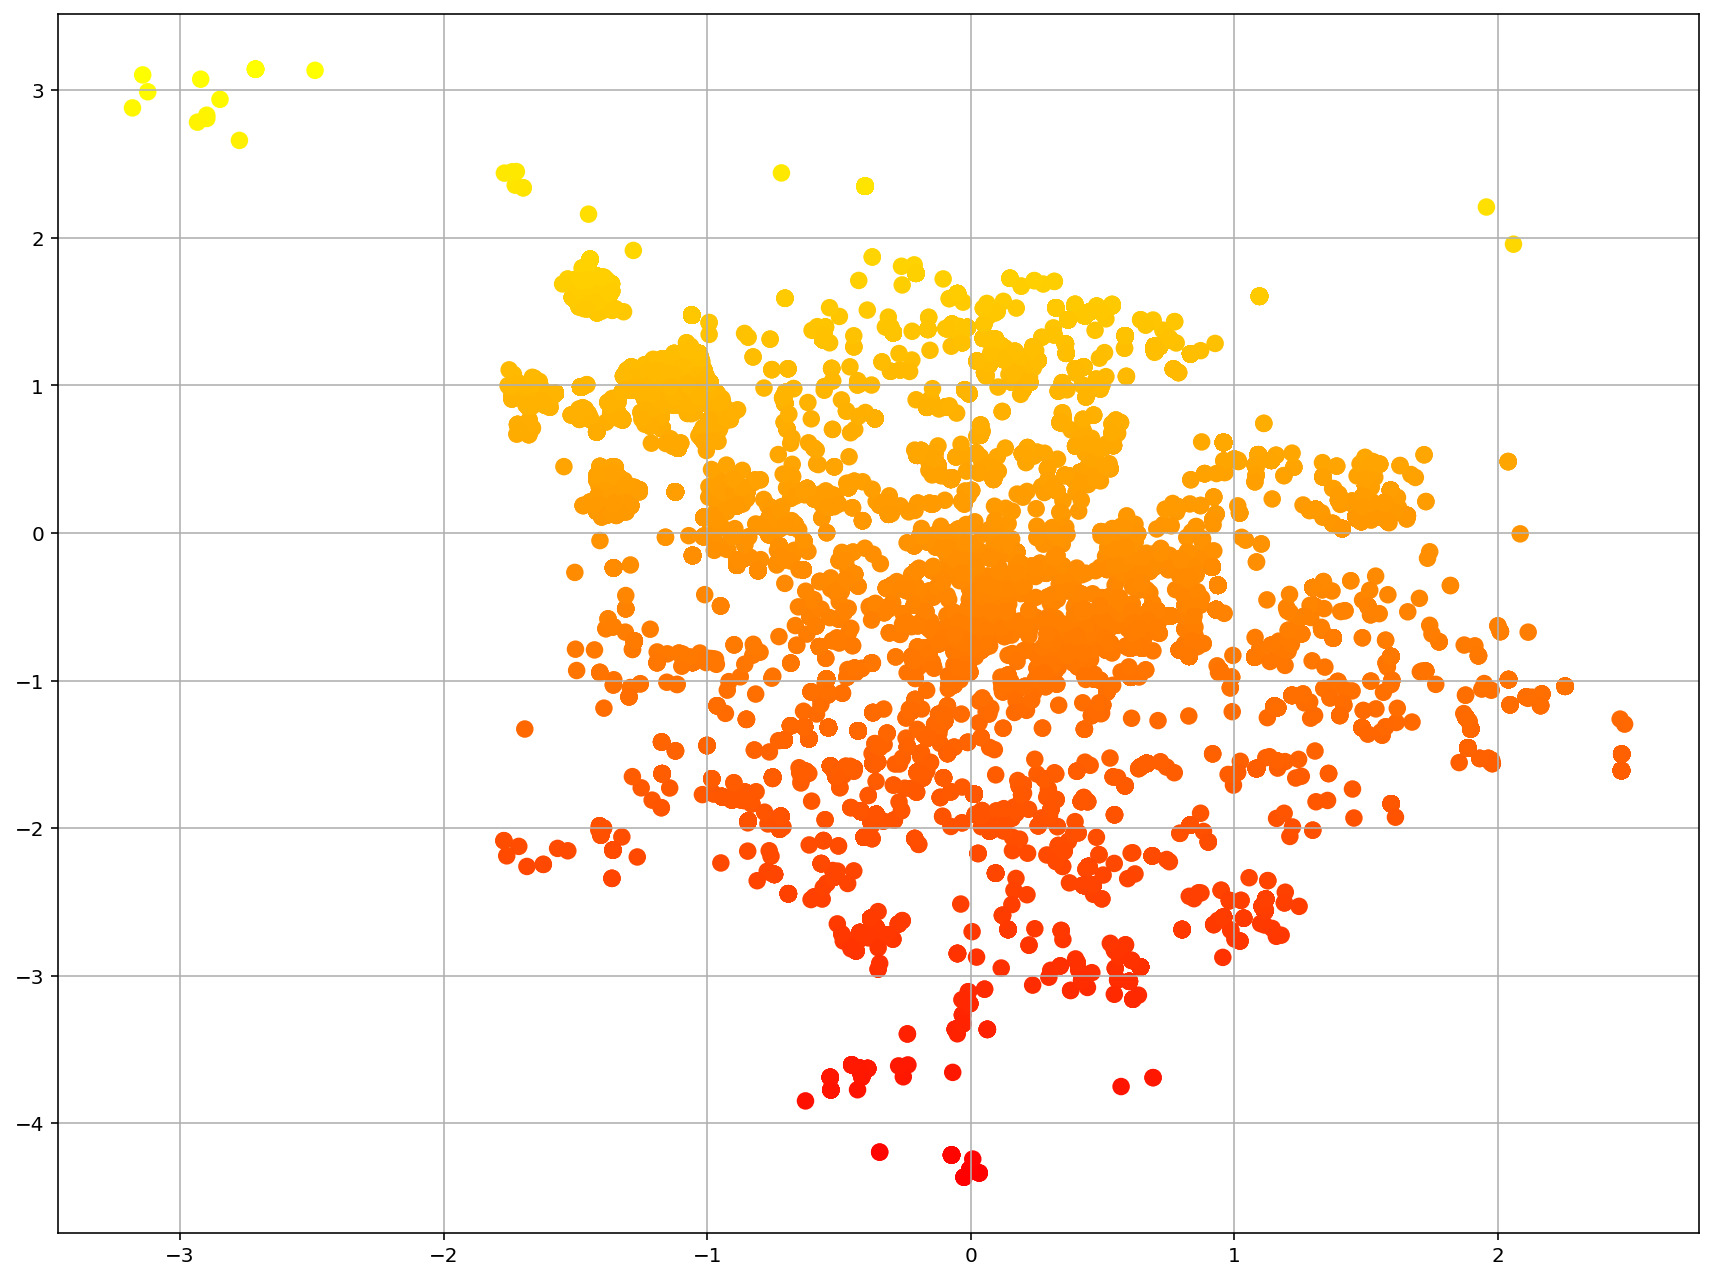

In [6]:
plt.scatter(X_std[:,0], X_std[:,1], c=X_std[:,1], cmap='autumn', s=60)
plt.grid()
plt.tight_layout()

#### 1. Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)


In [7]:
# Импортируем инструменты кластеризации и метрики
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [8]:
# Функция генерации метрик и названий методов
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [9]:
# Сделаем выборку, чтобы не перегружать ресурсы ПЭВМ
X_train, X_test = train_test_split(X_std, test_size=0.3, random_state=0)

In [10]:
clusters_random = np.random.randint(low=0, high=2, size=len(X_test))

In [11]:
import warnings
warnings.filterwarnings('ignore')

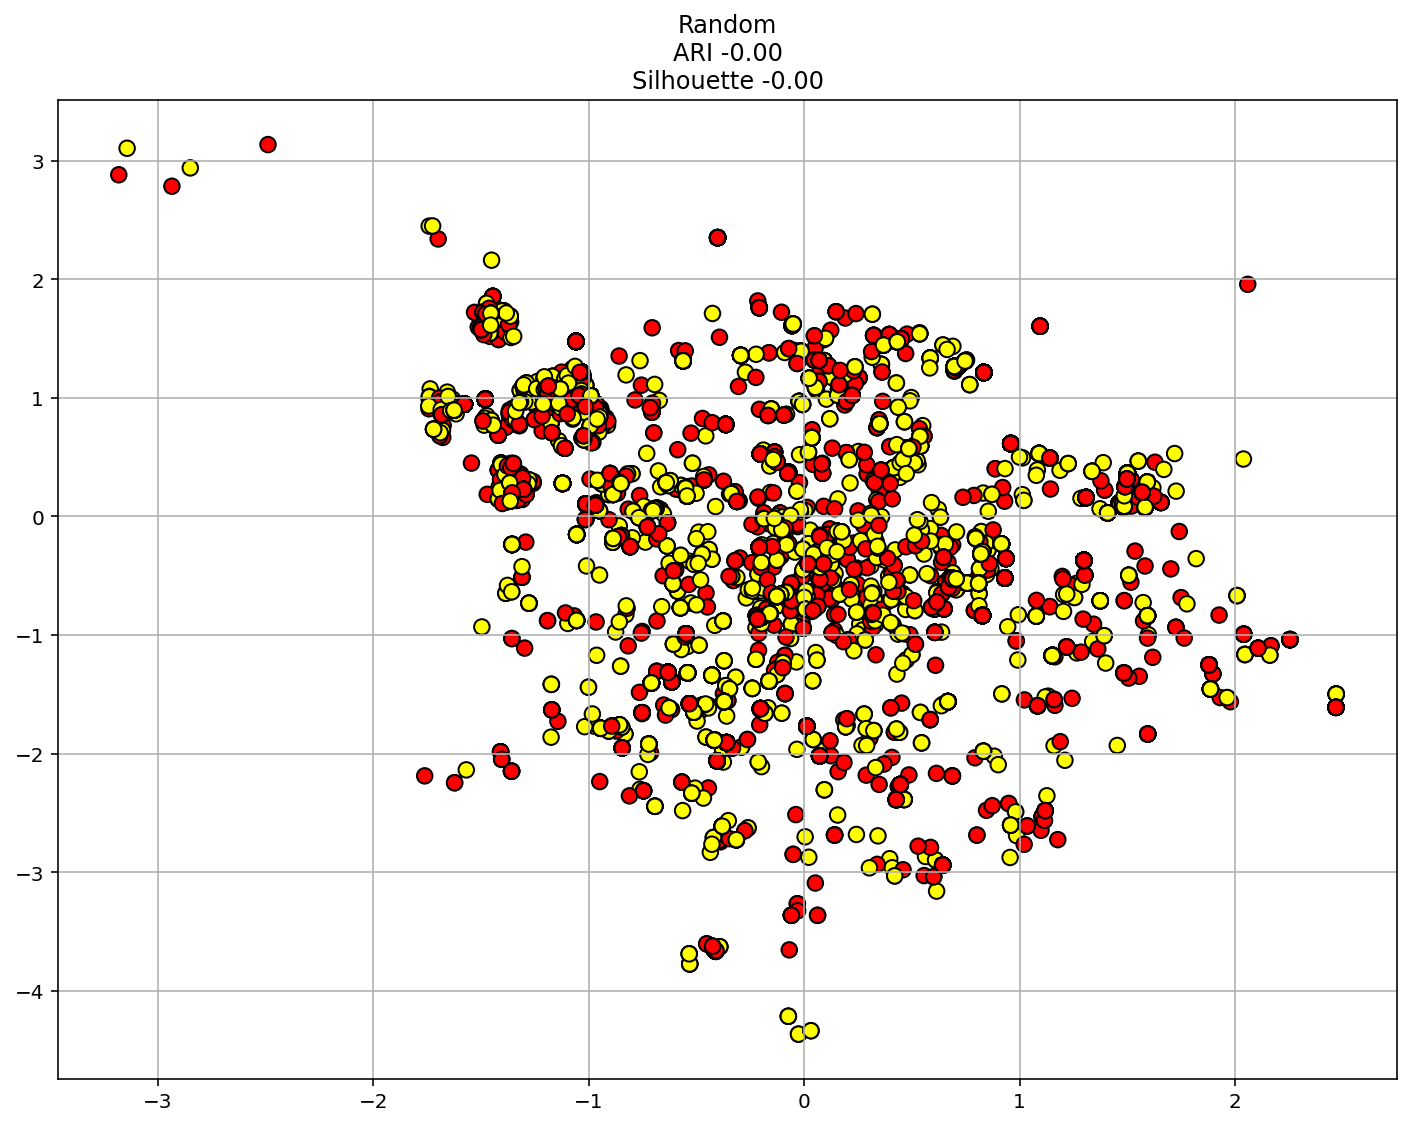

In [12]:
fig, axes = plt.subplots(figsize=(12, 9))
clusters_random = np.random.randint(low=0, high=2, size=len(X_test))
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters_random, cmap='autumn', s=60, edgecolor='black')
axes.set_title(get_descr("Random", X_test[:, 1], clusters_random, X_test))
axes.grid()

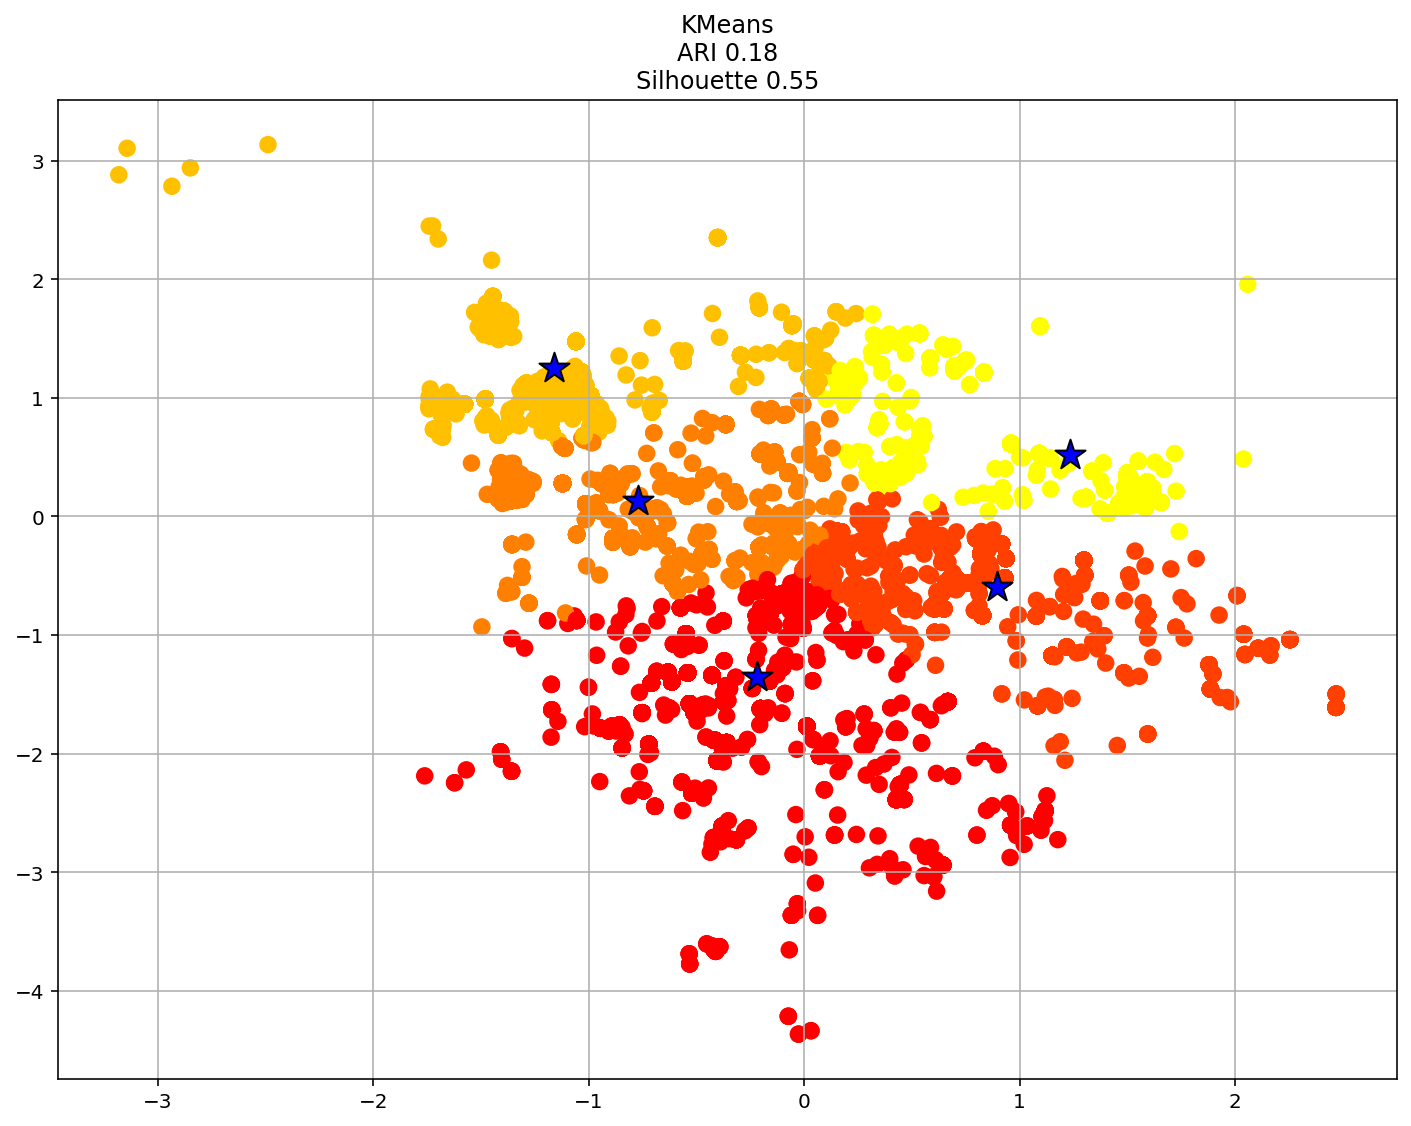

In [13]:
fig, axes = plt.subplots(figsize=(12, 9))
km = KMeans(n_clusters=5, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
clusters = km.fit_predict(X_test)
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters, cmap='autumn', s=60)
axes.set_title(get_descr('KMeans', X_test[:, 1], clusters, X_test))
axes.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')
axes.grid()

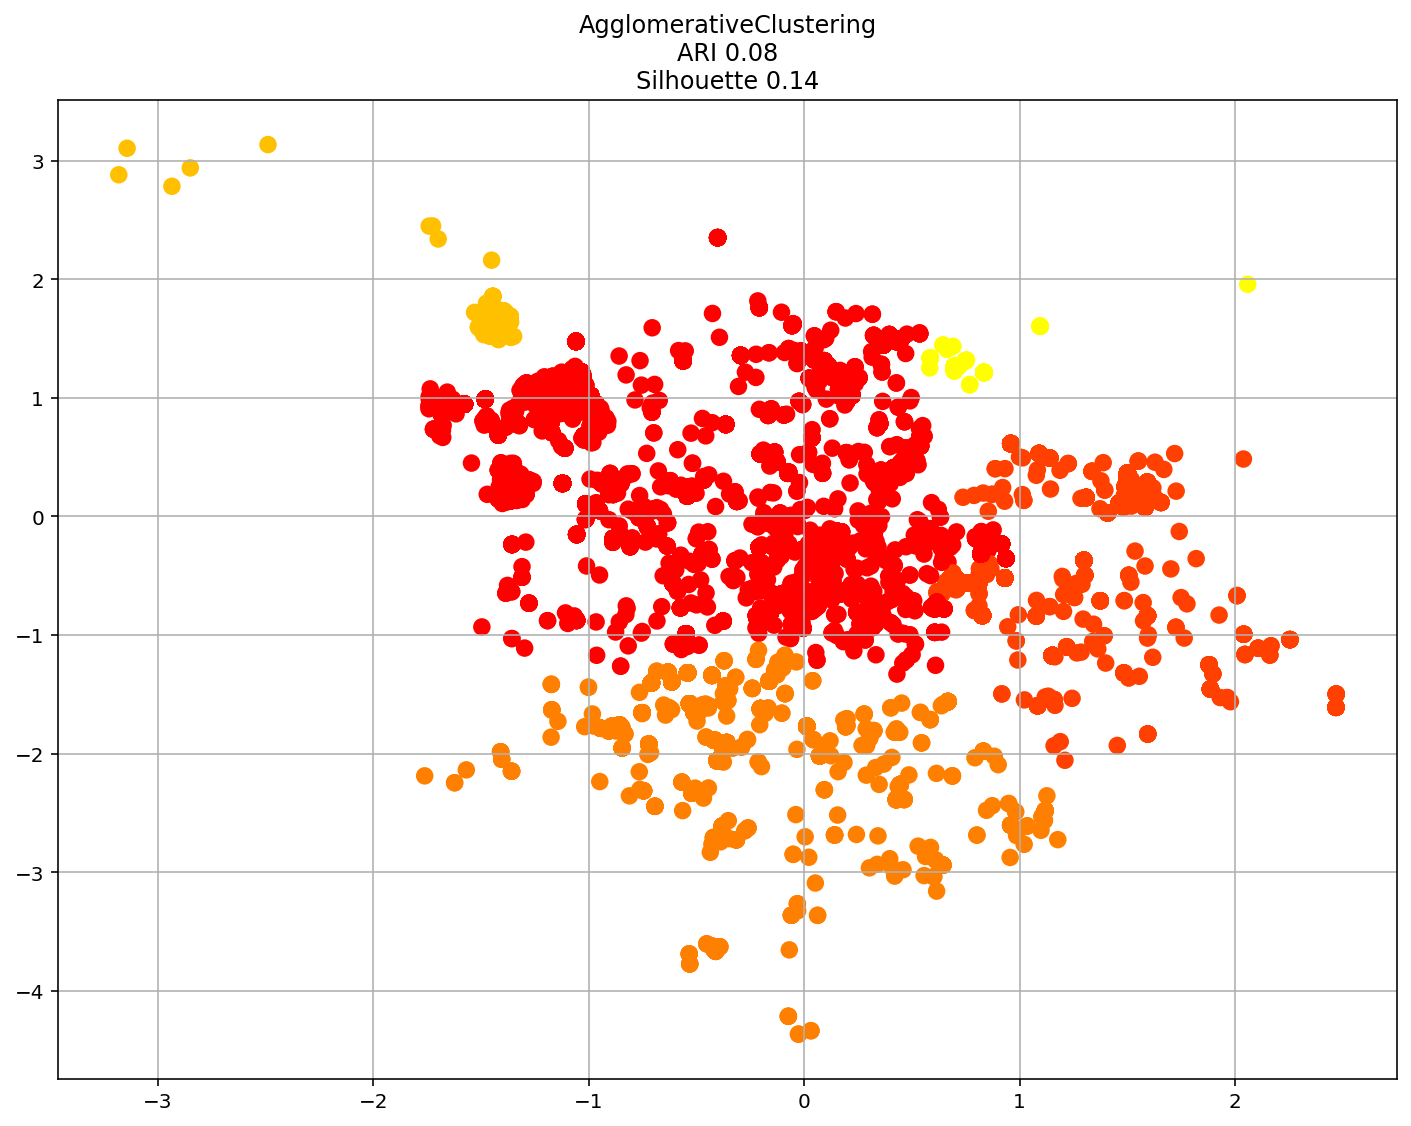

In [14]:
fig, axes = plt.subplots(figsize=(12, 9))
ag = AgglomerativeClustering(n_clusters=5, affinity='euclidean', 
                             linkage='complete')
clusters = ag.fit_predict(X_test)
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters, cmap='autumn', s=60)
axes.set_title(get_descr('AgglomerativeClustering', X_test[:, 1], clusters, X_test))
axes.grid()

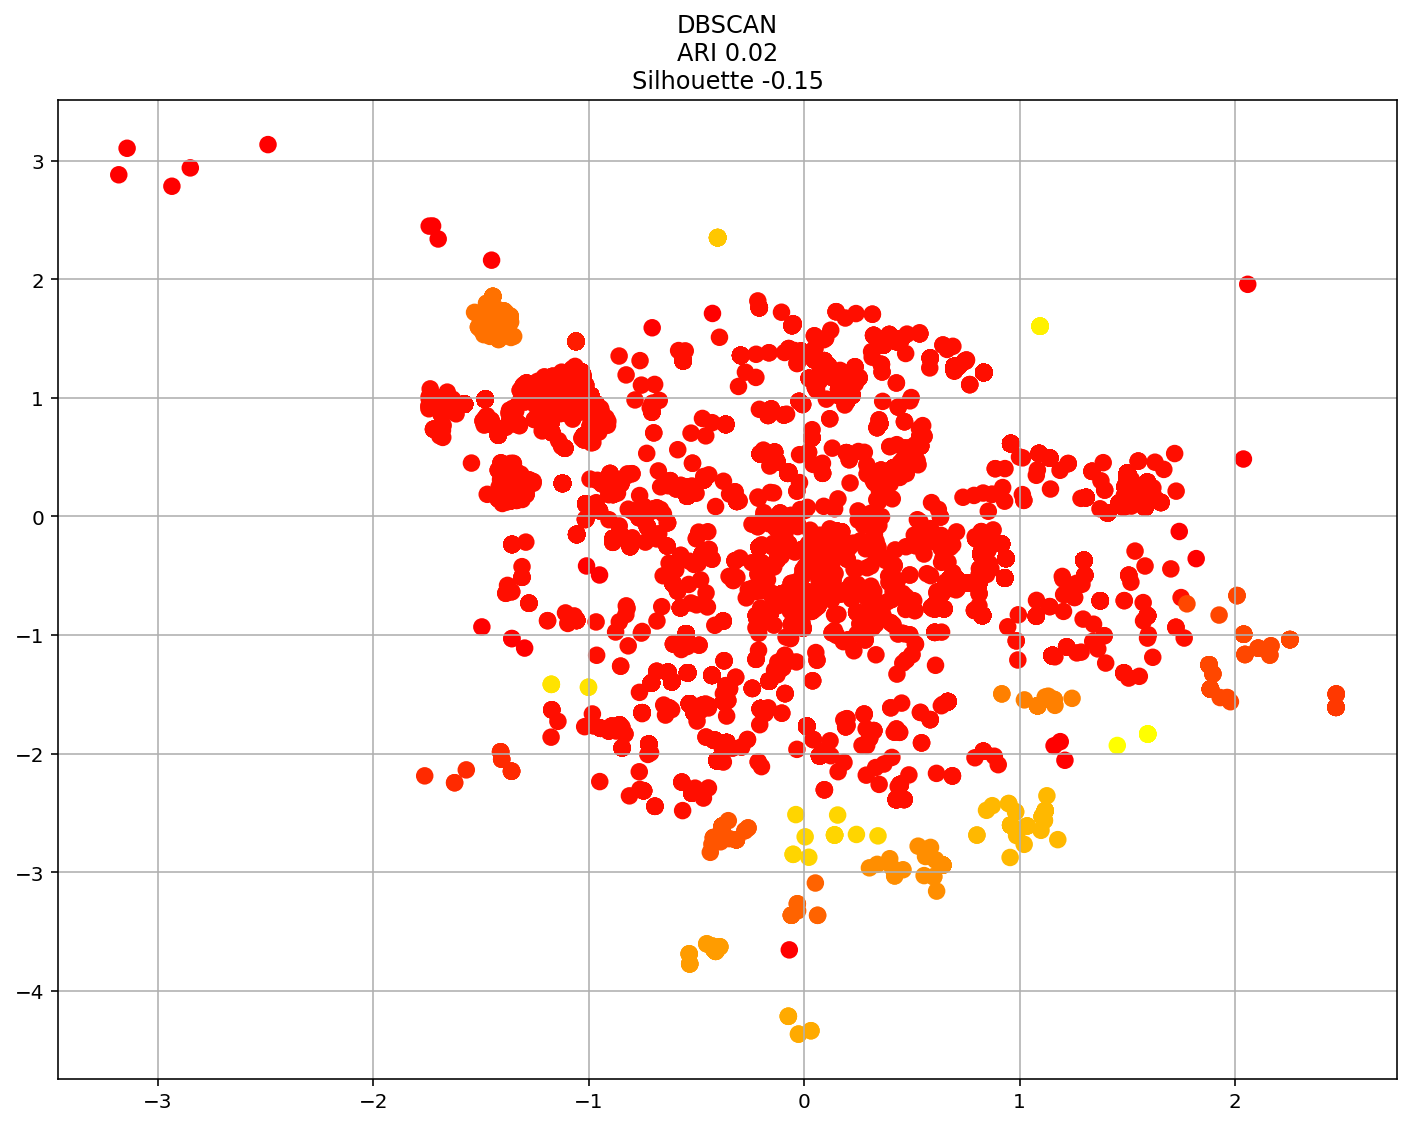

In [15]:
fig, axes = plt.subplots(figsize=(12, 9))
dbs = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
clusters = dbs.fit_predict(X_test)
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters, cmap='autumn', s=60)
axes.set_title(get_descr('DBSCAN', X_test[:, 1], clusters, X_test))
axes.grid()

##### 2. Aналогично исследовать скопления голосов за и против отдельно


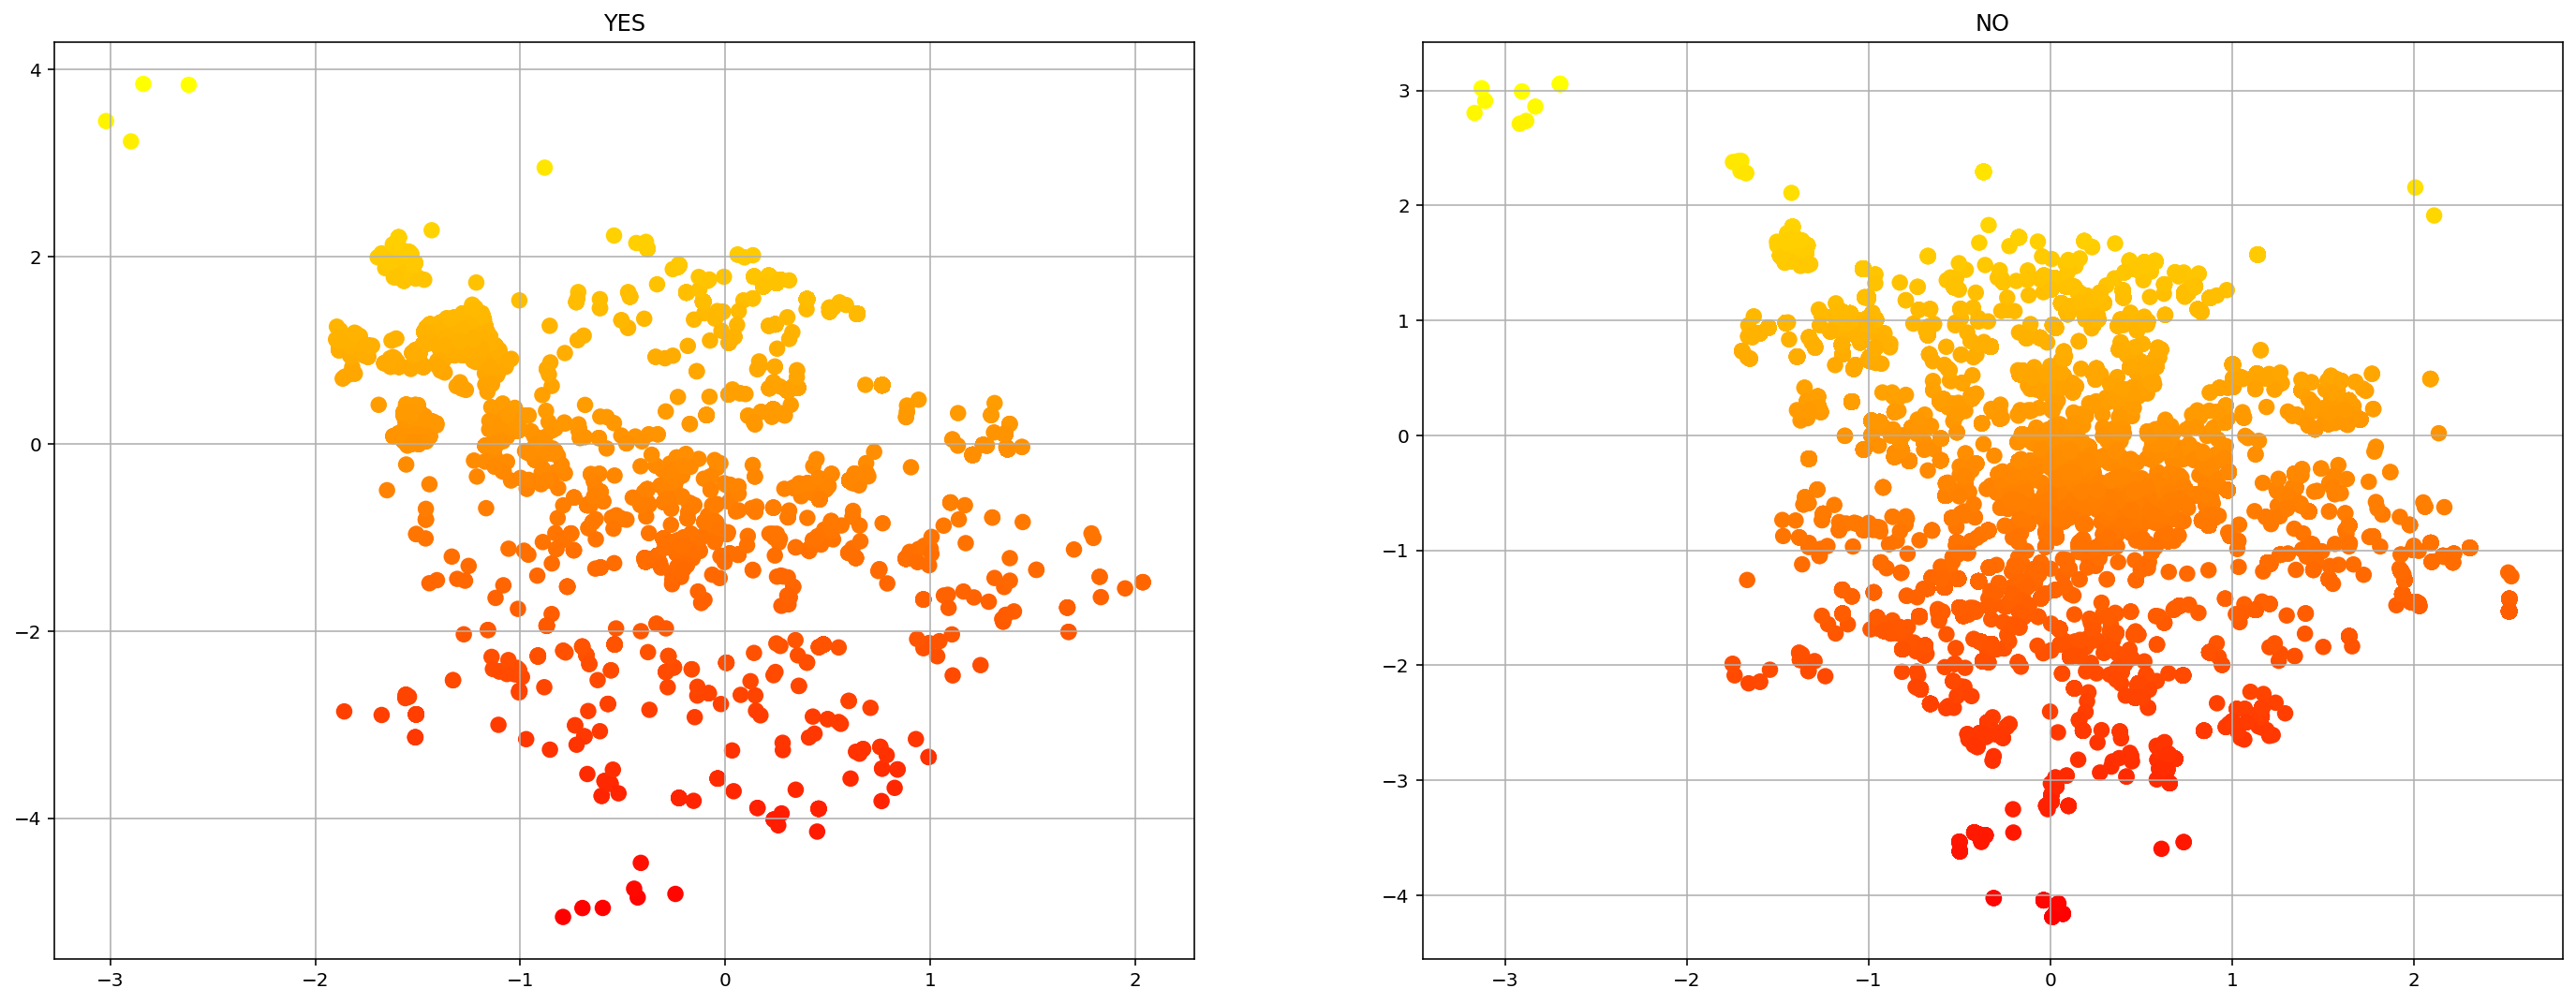

In [16]:
X1 = data.loc[data['comment_class'] == 1].drop(['Unnamed: 0', 'comment_class', 'multiplier', 'comment'], axis = 1)
X2 = data.loc[data['comment_class'] == -1].drop(['Unnamed: 0', 'comment_class', 'multiplier', 'comment'], axis = 1)
X1_std = sc.fit_transform(X1)
X2_std = sc.fit_transform(X2)
fig, axes = plt.subplots(1, 2, figsize=(24, 9))
axes[0].scatter(X1_std[:,0], X1_std[:,1], c=X1_std[:,1], cmap='autumn', s=60)
axes[0].set_title('YES')
axes[1].scatter(X2_std[:,0], X2_std[:,1], c=X2_std[:,1], cmap='autumn', s=60)
axes[1].set_title('NO')
axes[0].grid()
axes[1].grid()

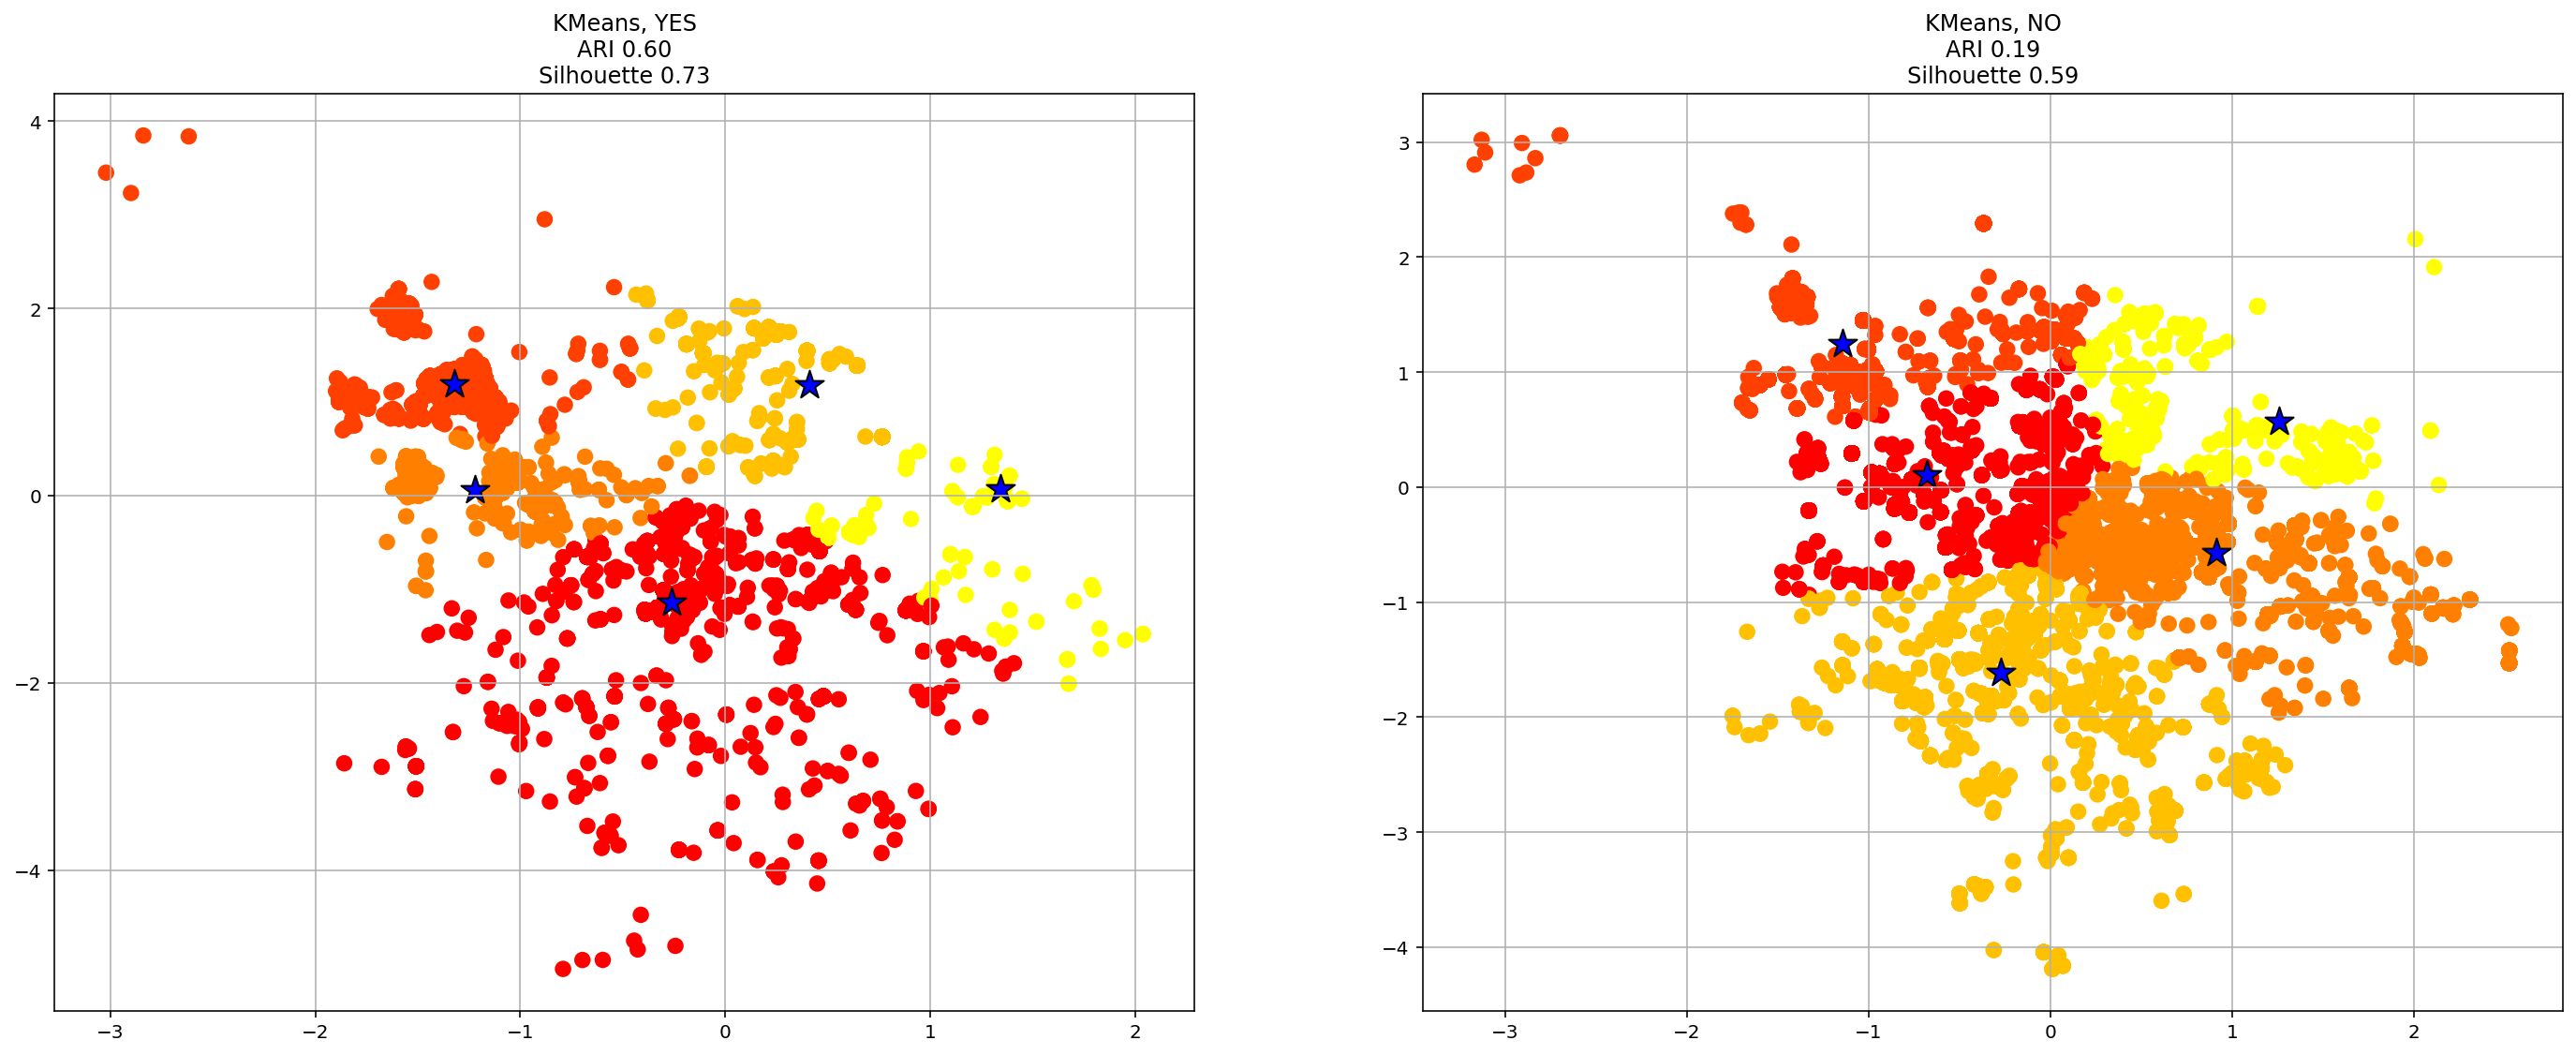

In [17]:
fig, axes = plt.subplots(1,2, figsize=(24, 9))
km = KMeans(n_clusters=5, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
clusters1 = km.fit_predict(X1_std)
axes[0].scatter(X1_std[:, 0], X1_std[:, 1], c=clusters1, cmap='autumn', s=60)
axes[0].set_title(get_descr('KMeans, YES', X1_std[:, 1], clusters1, X1_std))
axes[0].scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')

clusters2 = km.fit_predict(X2_std)
axes[1].scatter(X2_std[:, 0], X2_std[:, 1], c=clusters2, cmap='autumn', s=60)
axes[1].set_title(get_descr('KMeans, NO', X2_std[:, 1], clusters2, X2_std))
axes[1].scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')
axes[0].grid()
axes[1].grid()

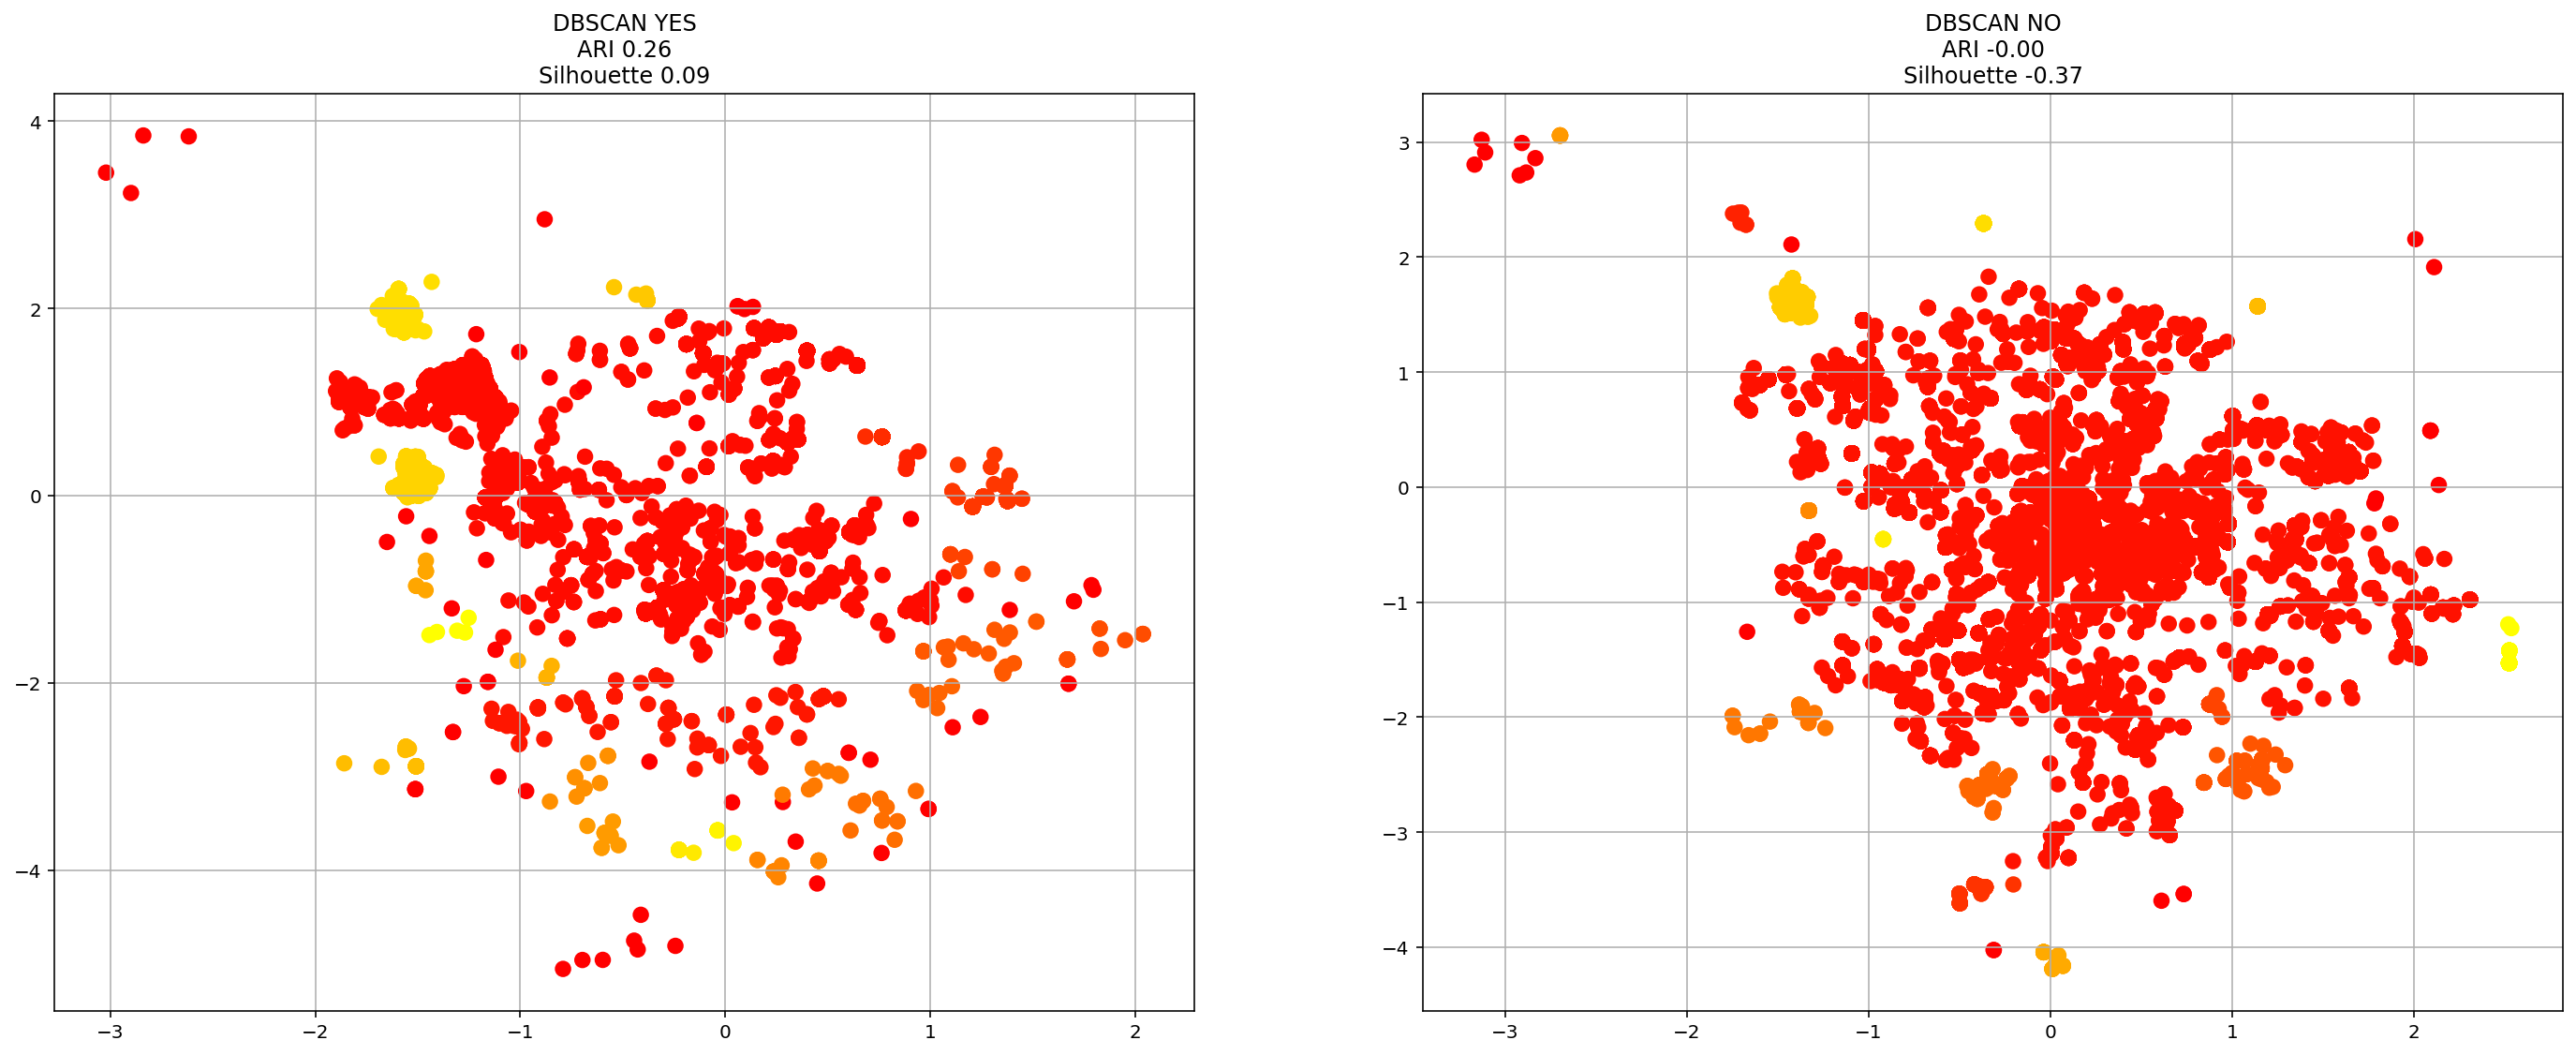

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(24, 9))
dbs = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
clusters1 = dbs.fit_predict(X1_std)
axes[0].scatter(X1_std[:, 0], X1_std[:, 1], c=clusters1, cmap='autumn', s=60)
axes[0].set_title(get_descr('DBSCAN YES', X1_std[:, 1], clusters1, X1_std))

clusters2 = dbs.fit_predict(X2_std)
axes[1].scatter(X2_std[:, 0], X2_std[:, 1], c=clusters2, cmap='autumn', s=60)
axes[1].set_title(get_descr('DBSCAN NO', X2_std[:, 1], clusters2, X2_std))
axes[0].grid()
axes[1].grid()

#### 3. Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
##### Подсчитаем оптимальное кол-во кластеров для K-Mean

In [19]:
k_inertia = []
ks = range(1,11)

for k in ks:
    km = KMeans(n_clusters=k, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
    
    clusters_kmeans = km.fit_predict(X_std, )
    k_inertia.append(km.inertia_)

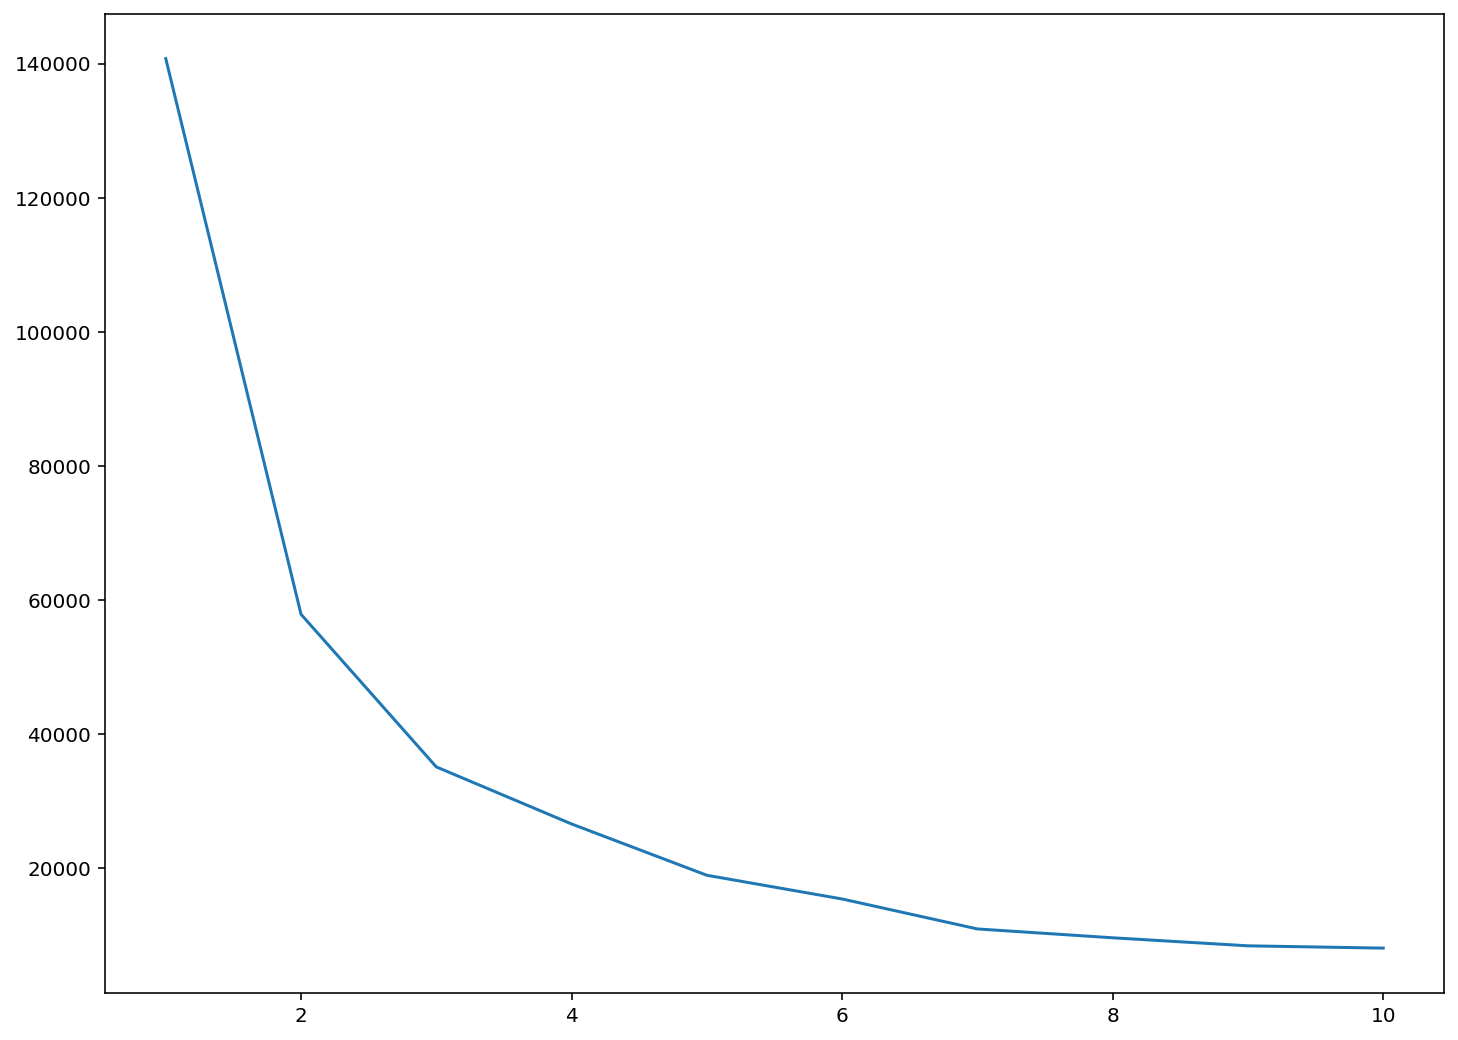

In [20]:
plt.plot(ks, k_inertia)

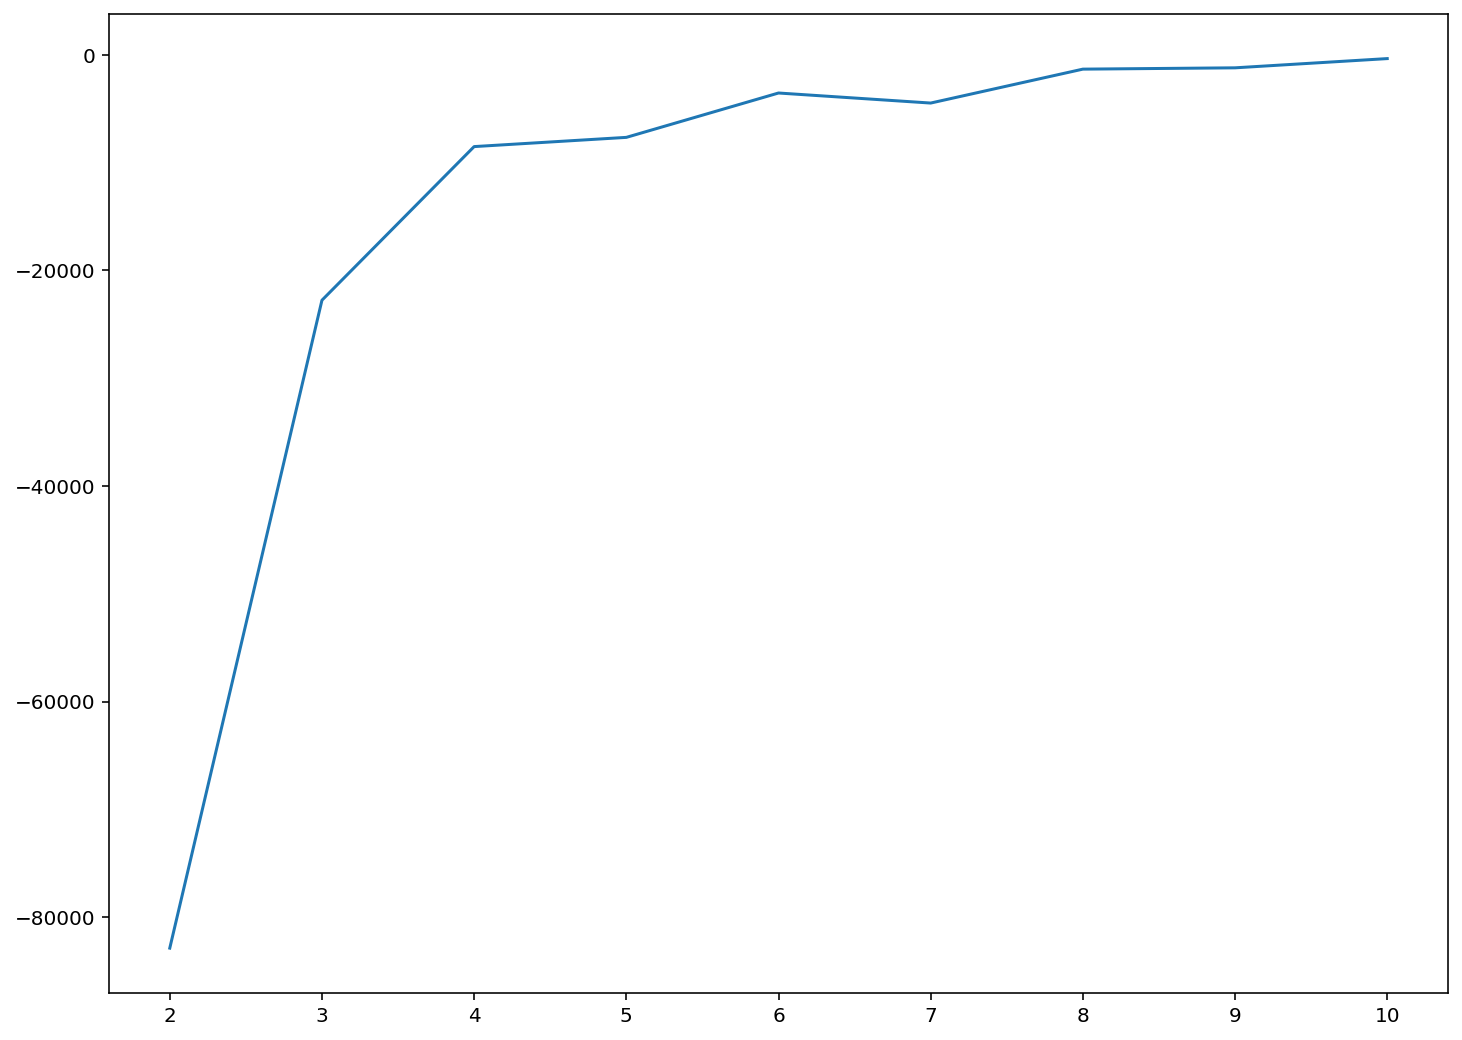

In [22]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

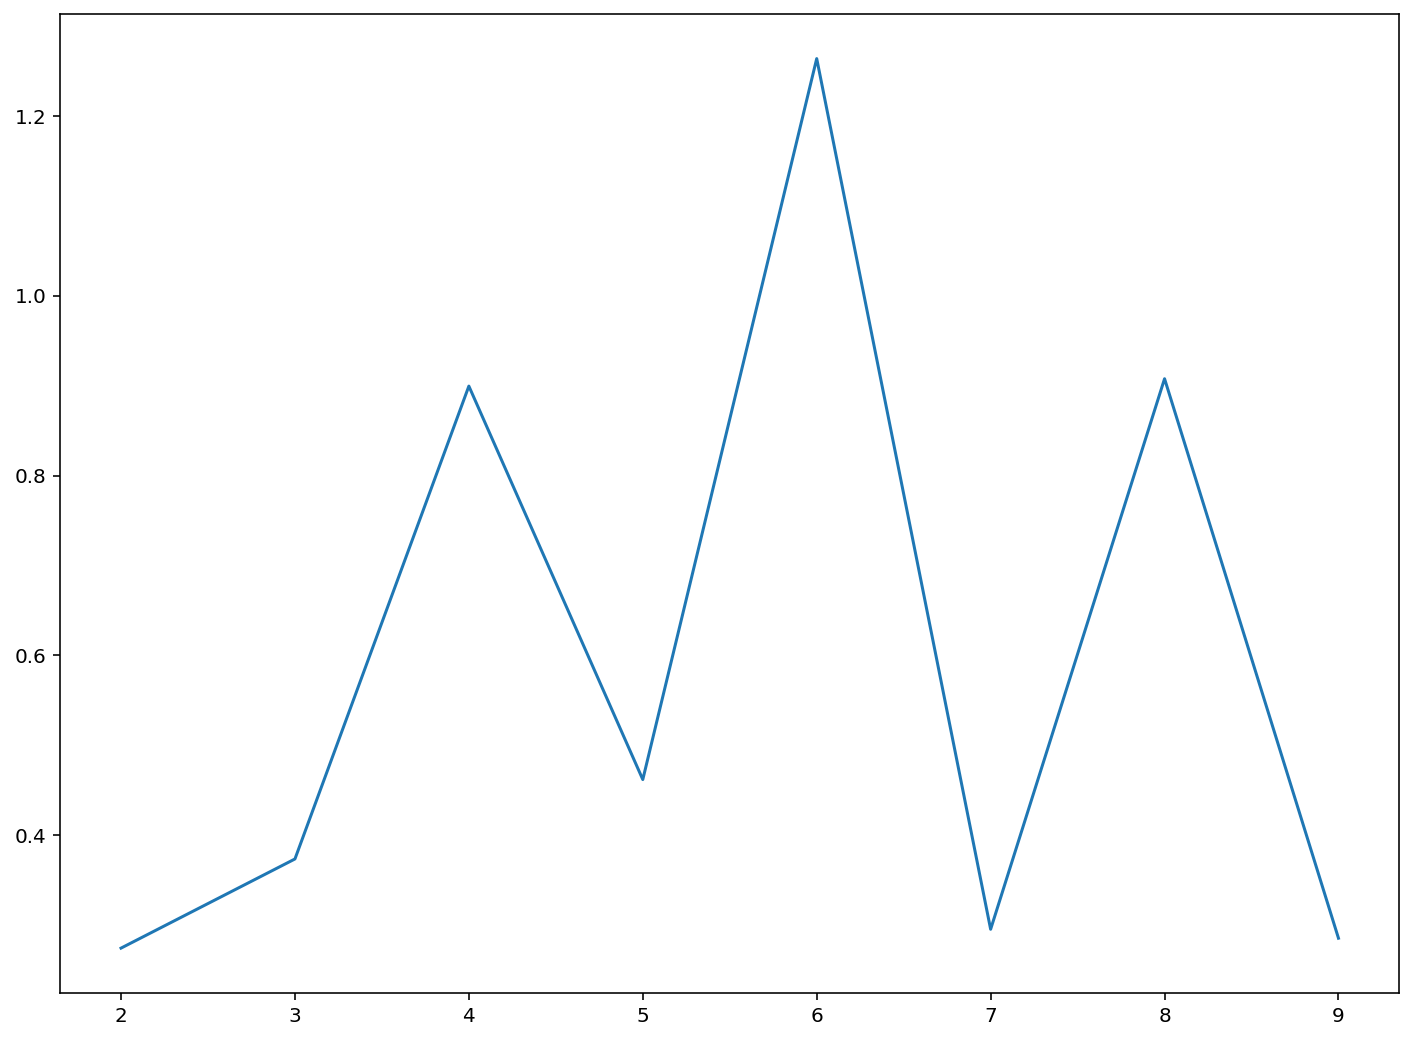

In [23]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [24]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

##### Построим кластеризацию с учётом подобранного числа кластеров

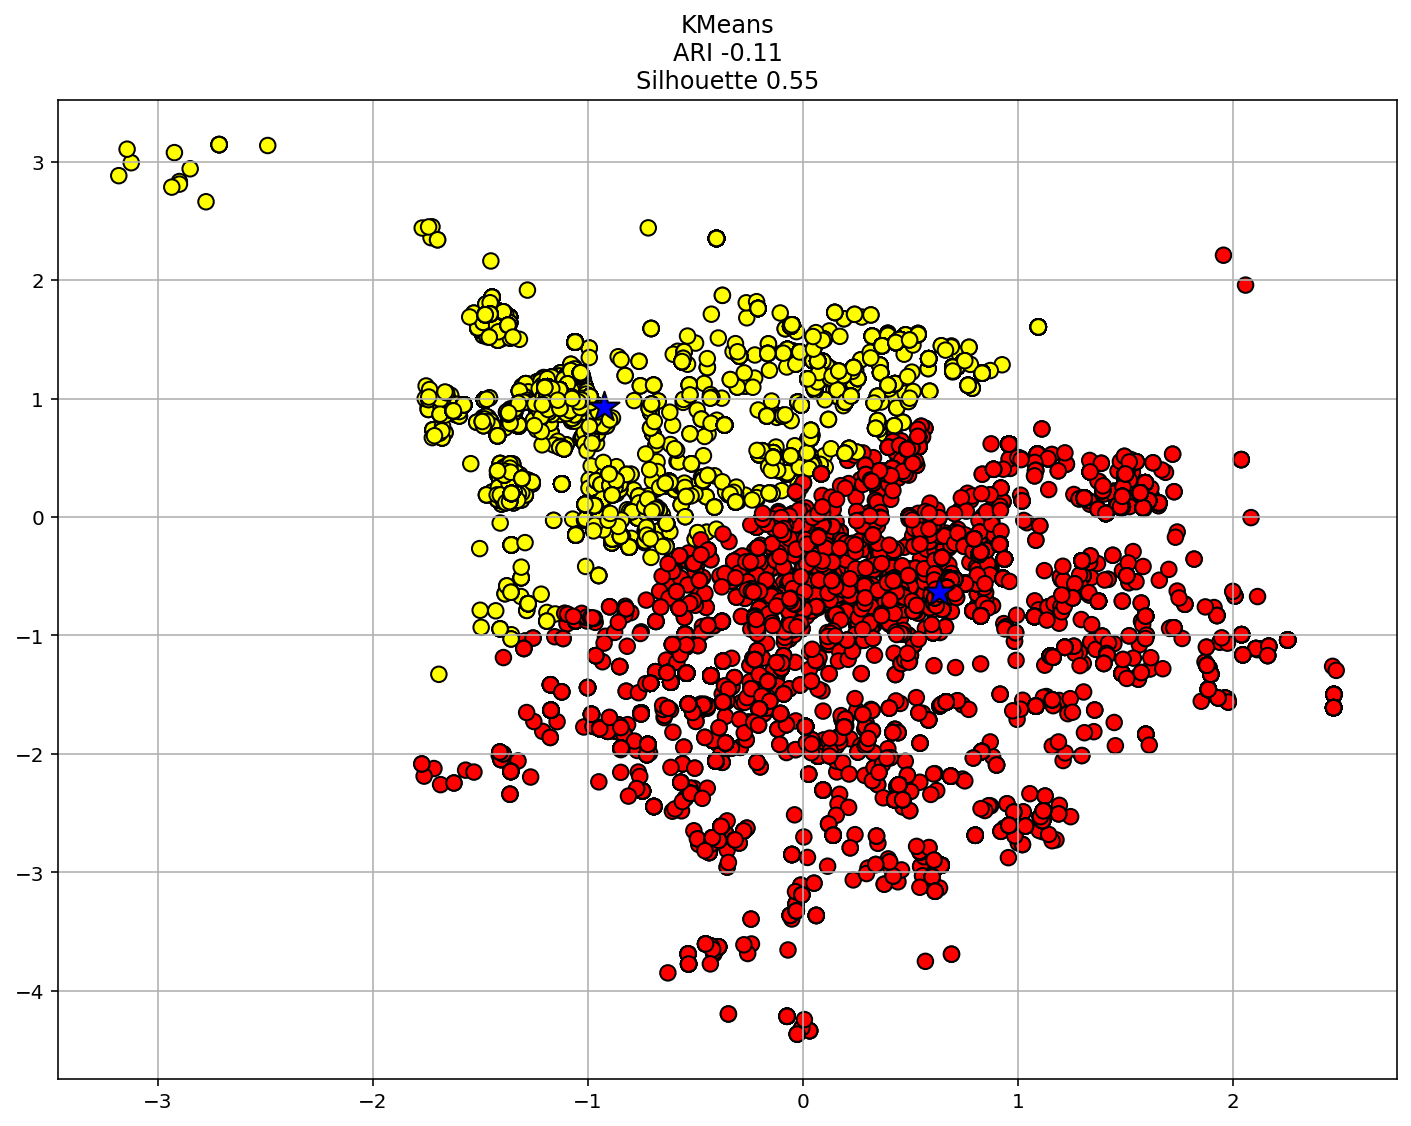

In [25]:
fig, axes = plt.subplots(figsize=(12, 9))
km = KMeans(n_clusters=2, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
clusters = km.fit_predict(X_std)
axes.scatter(X_std[:, 0], X_std[:, 1], c=clusters, cmap='autumn', s=60, edgecolor='black')
axes.set_title(get_descr('KMeans', X_std[:, 1], clusters, X_std))
axes.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')
axes.grid()

##### 4. Найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')
  


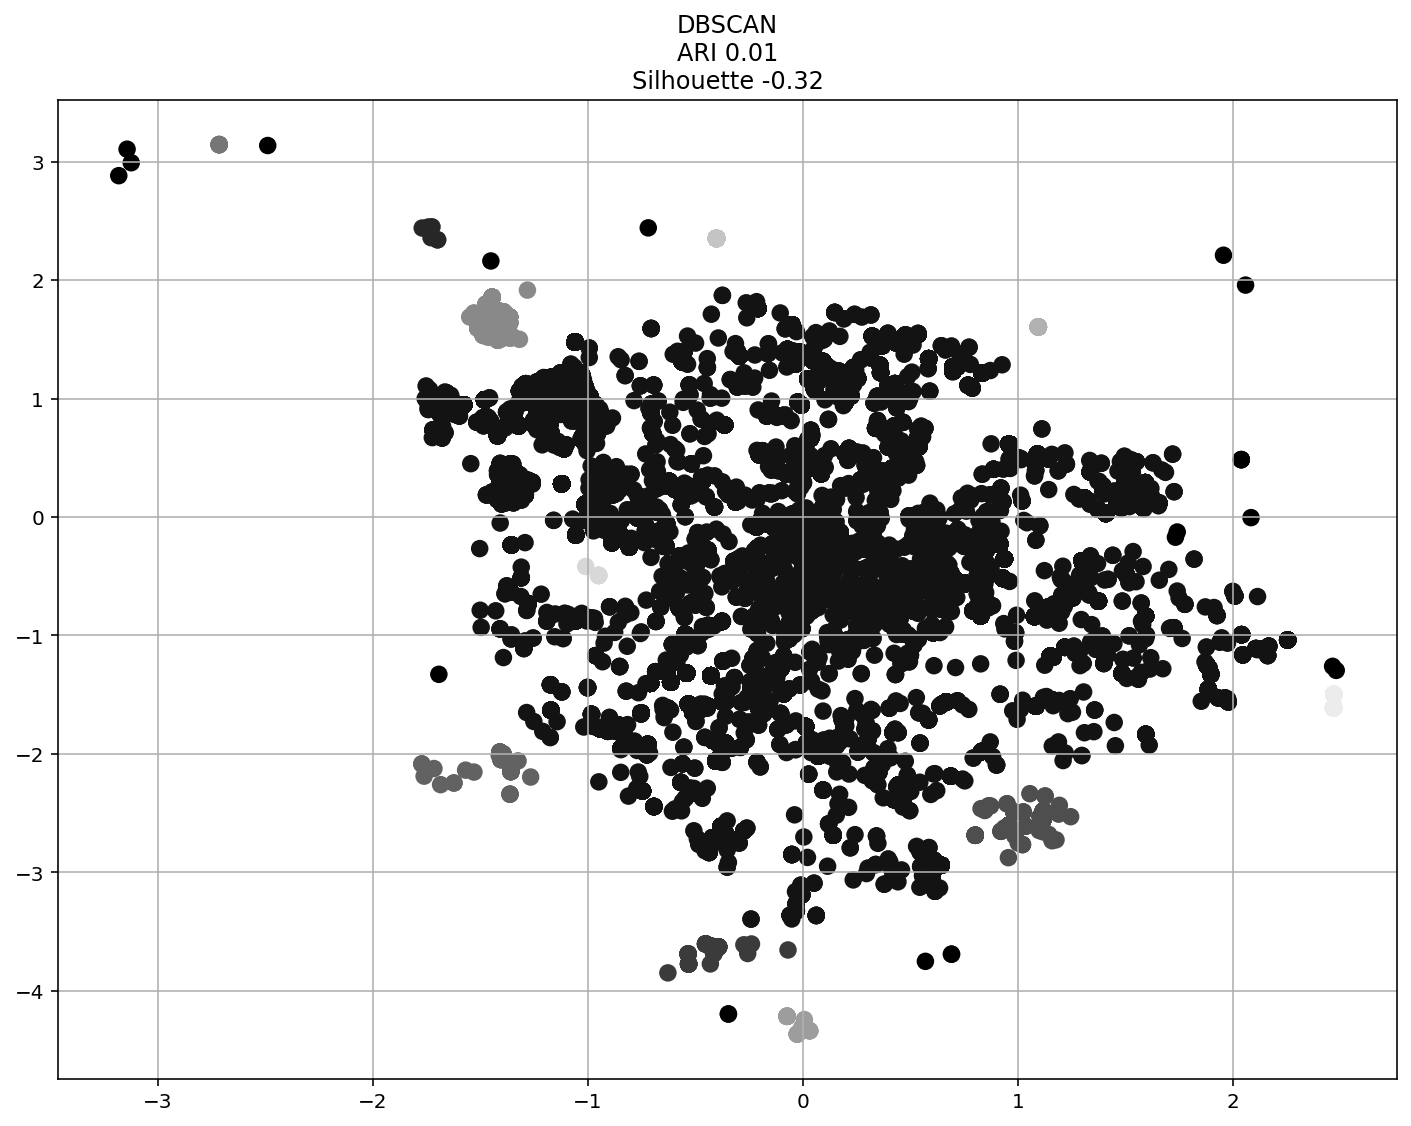

In [26]:
fig, axes = plt.subplots(figsize=(12, 9))
dbs = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
clusters = dbs.fit_predict(X_std)
axes.scatter(X_std[:, 0], X_std[:, 1], c=clusters, cmap='gray', s=60)
axes.set_title(get_descr('DBSCAN', X_std[:, 1], clusters, X_std))
axes.grid()

#####  5. Для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [27]:
text = data.comment.values
text = np.array2string((text), precision=2, separator='\\')
text

"['Во все разделы правил землепользования и застройки г.Москвы (текстовые части и\\xa0графические схемы) необходимо внести изменения по земельному участку с кадастровым\\xa0номером 77:01:0004002:188 с адресом первый Самотёчный пер., вл. 17Б (в ПЗЗ\\xa0территориальная зона №2034561) и исключить из этого земельного участка часть моей\\xa0общей долевой собственности - земельного участка многоквартирного дома 17А по 1-му\\xa0Самотёчному пер. площадью 650,5 кв.м с точками 1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-1 с\\xa0координатами: 12316.39 и 6983.68; 123224 6988.91; 12316,45 и 7009,60; 12328.04 и\\xa07013.46;12327.73 и 7014.41; 12330.06 и 7015.18; 12330.37 и 7014.24; 12335.17 и 7015.83;\\xa012330.82 и 7028.61; 12304.74 и 7021.28; 12302.02 и 7012.47; 12303.22 и 7005.49; 12297.24 и\\xa07004.18; 12297ю96 и 7000.60; 12311.23 и 7003.64; 12316.39 и 6983.68. - На основании\\xa0вступившего в законную силу судебного решения по делу № А40-51937/2011 от 11.06.2015 о\\xa0ничтожности заключённого 18.06

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [29]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [31]:
import pymorphy2
import re
morph = pymorphy2.MorphAnalyzer()
stop_words = stopwords.words('russian')
sentences_ = []
tokens_ = []
sentences = nltk.sent_tokenize(text, language="russian")
for sentence in sentences:
    sentence_ = re.sub(r"[^А-Яа-яёЁ ]","", sentence)
    sentences_ += [ sentence_]

    tokens = nltk.word_tokenize(sentence_)

    tokens = [i for i in tokens if (i not in stop_words)]

    tokens = list(map(lambda x: morph.parse(x)[0].normal_form, tokens))
    tokens_ += tokens

word = set(tokens_) # Мешок слов


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer = TfidfVectorizer(vocabulary = word)
V = vectorizer.fit(sentences_)

In [34]:
df = pd.DataFrame(data = V.transform(data.comment).toarray())
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.220623,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
70378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
70379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.276975,0.0,0.0
70380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


##### Объединим вектора в один столбец для удобства

In [35]:
df['combine'] = df.values.tolist()
df['combine']

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
70377    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
70378    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
70379    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
70380    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
70381    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: combine, Length: 70382, dtype: object

##### Определим косинусное растояние (похожесть текстов) между векторами каждого комментария и вектором общего текста

In [58]:
from math import dist
df['dist'] = df.apply(lambda x: dist(x['combine'], V.transform(sentences_).toarray()[0]), axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,combine,dist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.220623,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.442657
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.961209
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.289226
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.270161
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.270161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.307292
70378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.414214
70379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.276975,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.339902
70380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.414214


In [104]:
df = pd.DataFrame(df['dist'])
df = pd.concat([df, data['comment']], axis=1)

#### Основные тематики коментариев

In [109]:
df['comment'].loc[df['dist']<=0.95].values

array(['Во все разделы правил землепользования и застройки г.Москвы (текстовые части и\xa0графические схемы) необходимо внести изменения по земельному участку с кадастровым\xa0номером 77:01:0004002:188 с адресом первый Самотёчный пер., вл. 17Б (в ПЗЗ\xa0территориальная зона №2034561) и исключить из этого земельного участка часть моей\xa0общей долевой собственности - земельного участка многоквартирного дома 17А по 1-му\xa0Самотёчному пер. площадью 650,5 кв.м с точками 1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-1 с\xa0координатами: 12316.39 и 6983.68; 123224 6988.91; 12316,45 и 7009,60; 12328.04 и\xa07013.46;12327.73 и 7014.41; 12330.06 и 7015.18; 12330.37 и 7014.24; 12335.17 и 7015.83;\xa012330.82 и 7028.61; 12304.74 и 7021.28; 12302.02 и 7012.47; 12303.22 и 7005.49; 12297.24 и\xa07004.18; 12297ю96 и 7000.60; 12311.23 и 7003.64; 12316.39 и 6983.68. - На основании\xa0вступившего в законную силу судебного решения по делу № А40-51937/2011 от 11.06.2015 о\xa0ничтожности заключённого 18.06.2007 